<a href="https://www.kaggle.com/code/aicortex/binary-classification-of-income-levels-tensorflow?scriptVersionId=213554020" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="text-align: center; color: #FF5722; font-family: 'Arial Black', sans-serif; background-color: #FFE0B2; padding: 15px; border-radius: 10px;">
    Predicting Income Levels Using Neural Networks
</h1>
<p style="text-align: center; font-size: 16px; font-family: Tahoma, sans-serif; color: #4CAF50; background-color: #E8F5E9; padding: 10px; border-radius: 5px;">
    This notebook showcases a step-by-step process for data preprocessing, feature engineering, building a neural network model, and evaluating its performance on the Adult Income dataset.
</p>
<hr style="border: none; border-top: 3px dashed #3F51B5; margin: 20px 0;">



<h1 style="text-align: center; color: #6A5ACD; font-family: 'Verdana', sans-serif; background-color: #F8F8FF; padding: 15px; border-radius: 10px; border: 2px solid #483D8B;">
    📚 Importing Libraries
</h1>
<p style="text-align: center; font-size: 16px; font-family: 'Arial', sans-serif; color: #8B0000; background-color: #FFFAFA; padding: 10px; border-radius: 5px; border: 1px solid #DC143C;">
    This notebook starts by importing essential libraries for data processing, modeling, and visualization. Let's get started! 🚀
</p>
<ul style="font-size: 14px; font-family: 'Courier New', monospace; color: #2E8B57; background-color: #F5FFFA; padding: 15px; border-radius: 5px; border: 1px solid #3CB371;">
    <li>✨ <strong>TensorFlow</strong>: For building and training neural networks.</li>
    <li>📊 <strong>Pandas</strong>: For data manipulation and analysis.</li>
    <li>📈 <strong>Matplotlib</strong>: For visualizing data and model performance.</li>
    <li>🧪 <strong>Scikit-Learn</strong>: For preprocessing and evaluating the model.</li>
    <li>💡 <strong>Numpy</strong>: For numerical computations.</li>
</ul>
<hr style="border: none; border-top: 3px dashed #FF8C00; margin: 20px 0;">


In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

<!-- Markdown Cell -->
<h1 style="text-align: center; color: #FF4500; font-family: 'Verdana', sans-serif; background-color: #FFF5EE; padding: 15px; border-radius: 10px; border: 2px solid #CD5C5C;">
    📂 Loading and Exploring the Dataset
</h1>

<hr style="border: none; border-top: 3px solid #FF6347; margin: 20px 0;">


In [2]:
df = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB



<h1 style="text-align: center; color: #4CAF50; font-family: 'Verdana', sans-serif; background-color: #E8F5E9; padding: 15px; border-radius: 10px; border: 2px solid #388E3C;">
    🏗️ Splitting Data into Train and Test Sets
</h1>

<hr style="border: none; border-top: 3px solid #66BB6A; margin: 20px 0;">


In [4]:
lb = LabelEncoder()

X = df.drop('income', axis=1)
y = lb.fit_transform(df['income'])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                    stratify=y)


<h1 style="text-align: center; color: #FFA500; font-family: 'Verdana', sans-serif; background-color: #FFF8DC; padding: 15px; border-radius: 10px; border: 2px solid #FF8C00;">
    🗂️ Defining Ordered and Unordered Categories
</h1>

<hr style="border: none; border-top: 3px solid #FFB74D; margin: 20px 0;">


In [5]:
unorder_col = ['workclass', 'marital-status', 
               'occupation', 'relationship', 'race', 
               'gender', 'native-country']

order_col = ['education']
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', 
                   '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 
                   'Assoc-acdm', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']

unorder_categories = [
    ['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov', 
     'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],  # workclass
    ['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 
     'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],  # marital-status
    ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
     'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
     'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
     'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],  # occupation
    ['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife', 
     'Other-relative'],  # relationship
    ['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'],  # race
    ['Male', 'Female'],  # gender
    ['United-States', '?', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Republic',
     'Ireland', 'Germany', 'Philippines', 'Thailand', 'Haiti', 'El-Salvador',
     'Puerto-Rico', 'Vietnam', 'South', 'Columbia', 'Japan', 'India', 'Cambodia',
     'Poland', 'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
     'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica', 'Ecuador',
     'Yugoslavia', 'Hungary', 'Hong', 'Greece', 'Trinadad&Tobago',
     'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands']  # native-country
]


<h1 style="text-align: center; color: #007BFF; font-family: 'Verdana', sans-serif; background-color: #E3F2FD; padding: 15px; border-radius: 10px; border: 2px solid #0056b3;">
    🛠️ Applying Column Transformations
</h1>

<hr style="border: none; border-top: 3px solid #64B5F6; margin: 20px 0;">


In [6]:
ct = ColumnTransformer(transformers=[
    ('num', StandardScaler(), make_column_selector(dtype_include='number')),
    ('cat_un_order', OneHotEncoder(drop='first',categories=unorder_categories), unorder_col),
    ('cat_order', OrdinalEncoder(categories=[education_order]), order_col),
])

ct

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b51a8e1feb0>),
                                ('cat_un_order',
                                 OneHotEncoder(categories=[['Private',
                                                            'Local-gov', '?',
                                                            'Self-emp-not-inc',
                                                            'Federal-gov',
                                                            'State-gov',
                                                            'Self-emp-inc',
                                                            'Without-pay',
                                                            'Never-worked'],
                                                           ['Never-married',
                                                            'Married-civ-spouse',
                                                            'Widowed',
                                                            'Divo...
                                                            'Honduras', ...]],
                                               drop='first'),
                                 ['workclass', 'marital-status', 'occupation',
                                  'relationship', 'race', 'gender',
                                  'native-country']),
                                ('cat_order',
                                 OrdinalEncoder(categories=[['Preschool',
                                                             '1st-4th',
                                                             '5th-6th',
                                                             '7th-8th', '9th',
                                                             '10th', '11th',
                                                             '12th', 'HS-grad',
                                                             'Some-college',
                                                             'Assoc-voc',
                                                             'Assoc-acdm',
                                                             'Bachelors',
                                                             'Masters',
                                                             'Doctorate',
                                                             'Prof-school']]),
                                 ['education'])])

In [7]:
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)


<h1 style="text-align: center; color: #28A745; font-family: 'Verdana', sans-serif; background-color: #E8F5E9; padding: 15px; border-radius: 10px; border: 2px solid #218838;">
    🧠 Building the Neural Network Model
</h1>
<p style="text-align: center; font-size: 16px; font-family: 'Arial', sans-serif; color: #FF5722; background-color: #FFEBEE; padding: 10px; border-radius: 5px; border: 1px solid #E53935;">
    🔹 <strong>Input Layer:</strong> Takes the shape of the transformed dataset (<code>X_train_transformed</code>) to ensure compatibility with input data.
</p>
<p style="text-align: center; font-size: 16px; font-family: 'Arial', sans-serif; color: #2196F3; background-color: #E3F2FD; padding: 10px; border-radius: 5px; border: 1px solid #1976D2;">
    🔹 <strong>Hidden Layers:</strong> Two layers with <code>64</code> and <code>10</code> units respectively, using the <code>ReLU</code> activation function for non-linear transformations.
</p>
<p style="text-align: center; font-size: 16px; font-family: 'Arial', sans-serif; color: #9C27B0; background-color: #F3E5F5; padding: 10px; border-radius: 5px; border: 1px solid #7B1FA2;">
    🔹 <strong>Output Layer:</strong> A single unit with <code>sigmoid</code> activation to predict binary outcomes (e.g., income class).
</p>
<p style="text-align: center; font-size: 16px; font-family: 'Arial', sans-serif; color: #FF9800; background-color: #FFF3E0; padding: 10px; border-radius: 5px; border: 1px solid #FB8C00;">
    🔹 <strong>Compilation:</strong> Optimized with <code>Adam</code>, uses <code>Binary Cross-Entropy</code> as the loss function, and evaluates with <code>Binary Accuracy</code>.
</p>
<hr style="border: none; border-top: 3px solid #4CAF50; margin: 20px 0;">


In [8]:
input = X_train_transformed.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(input,)),
    tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid),
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=[tf.keras.metrics.BinaryAccuracy])

<h1 style="text-align: center; color: #FF8C00; font-family: 'Verdana', sans-serif; background-color: #FFF3E0; padding: 15px; border-radius: 10px; border: 2px solid #FB8C00;">
    ⏳ Training the Model with Early Stopping
</h1>

<hr style="border: none; border-top: 3px solid #FF6F00; margin: 20px 0;">


In [9]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

history = model.fit(X_train_transformed, y_train,
          epochs=25,
          validation_split=0.2,
          callbacks=[es]
         )

Epoch 1/25
916/916 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.8282 - loss: 0.3772 - val_binary_accuracy: 0.8482 - val_loss: 0.3257
Epoch 2/25
916/916 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8567 - loss: 0.3099 - val_binary_accuracy: 0.8486 - val_loss: 0.3222
Epoch 3/25
916/916 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8582 - loss: 0.3058 - val_binary_accuracy: 0.8501 - val_loss: 0.3222
Epoch 4/25
916/916 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8531 - loss: 0.3100 - val_binary_accuracy: 0.8501 - val_loss: 0.3204
Epoch 5/25
916/916 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8586 - loss: 0.3020 - val_binary_accuracy: 0.8499 - val_loss: 0.3208
Epoch 6/25
916/916 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8561 - loss: 0.3059 - val_binary_accuracy: 0.8496 - val_loss: 0.3218
Epoch 7/25
916/916 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8603 - loss: 0.2996 - val_binary_accuracy: 0.8499 - val_loss: 0.3193
Epoch 


<h1 style="text-align: center; color: #3F51B5; font-family: 'Verdana', sans-serif; background-color: #E8EAF6; padding: 15px; border-radius: 10px; border: 2px solid #303F9F;">
    📊 Visualizing Model Performance
</h1>
<p style="text-align: center; font-size: 16px; font-family: 'Arial', sans-serif; color: #1A237E; background-color: #C5CAE9; padding: 10px; border-radius: 5px; border: 1px solid #3949AB;">
    The following visualizations show the training and validation loss and accuracy across epochs, providing insights into model performance. A confusion matrix and classification report are also displayed for detailed evaluation. 📉📈
</p>
<hr style="border: none; border-top: 3px solid #7986CB; margin: 20px 0;">


In [10]:
model.evaluate(X_test_transformed, y_test)

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.8584 - loss: 0.3081


[0.3091873526573181, 0.8580787777900696]

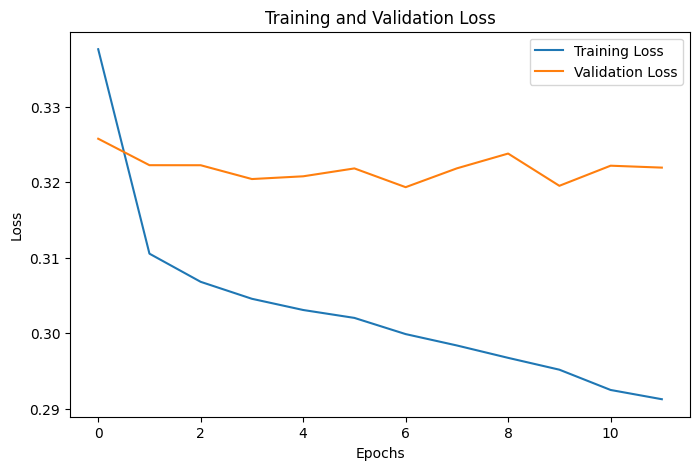

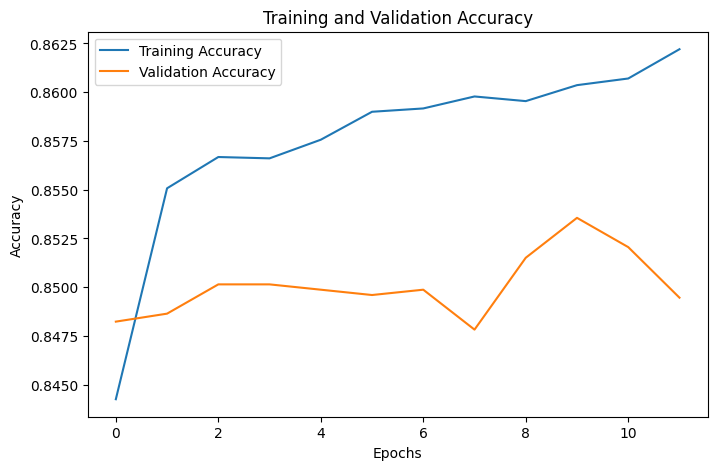

In [11]:
history_dict = history.history

plt.figure(figsize=(8, 5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_dict['binary_accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [12]:
y_pred = model.predict(X_test_transformed)
y_pred_binary = (y_pred >= 0.5).astype(int)

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


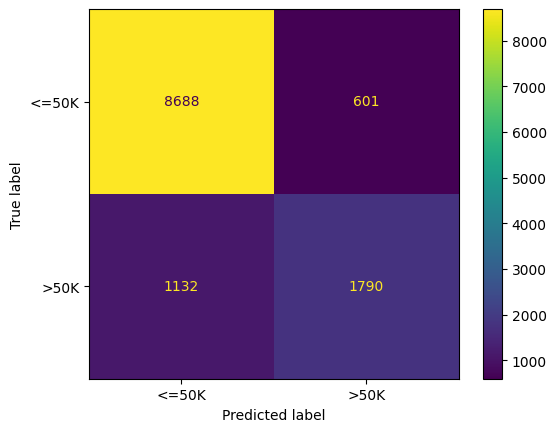

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_binary, display_labels=lb.classes_)
plt.show()

In [14]:
print(classification_report(y_pred_binary, y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      9820
           1       0.61      0.75      0.67      2391

    accuracy                           0.86     12211
   macro avg       0.77      0.82      0.79     12211
weighted avg       0.87      0.86      0.86     12211

